In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/home/manik/images/messi1.jpg')

### Matplotlib takes images as rgb  whereas cv2 reads them in as bgr

In [3]:
b,g,r = cv2.split(img)

In [4]:
img2 = cv2.merge([r,g,b])

In [5]:
%matplotlib inline

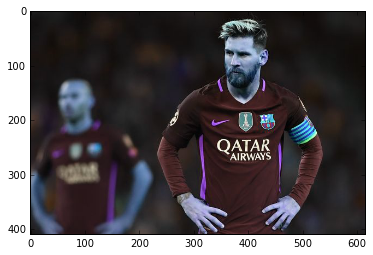

In [6]:
plt.imshow(img)
plt.show()

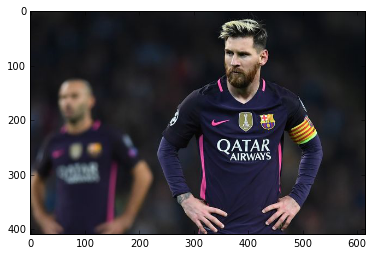

In [7]:
plt.imshow(img2)

In [8]:
#cv2.imshow('messi original',img)
#cv2.imshow('messi rgb',img2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Accessing pixels of the image
### img is a 2d matrix of triplets b,g,r

In [9]:
print(img[30,30])
print(img[30,30,1]) #use item for faster access
img[30,30,1] = 28 #you can use itemset instead for faster access
print(img[30,30])
img[30,30] = [20,20,20]
print(img[30,30])

[25 23 23]
23
[25 28 23]
[20 20 20]


## Accessing properties of an image

In [10]:
print(img.shape)

(409, 615, 3)


In [11]:
print img.size

754605


In [12]:
print img.dtype #Wrong data type is a source of a large no. of errors

uint8


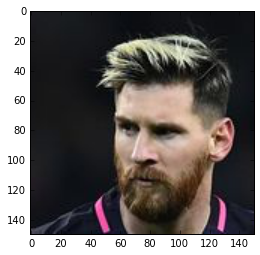

In [13]:
#I am using matplot lib so that the output can be easily seen here
face = img[0:150,300:450]
faceCopy = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(faceCopy)
#cv2.imshow('messi_face',face)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

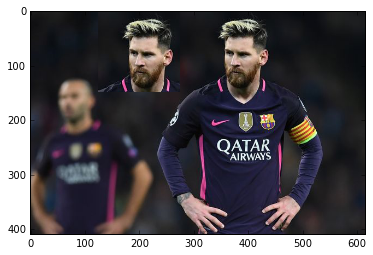

In [14]:
img[0:150,125:275] = face
imgCopy = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(imgCopy)
#cv2.imshow('messi_double_face2',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [15]:
#restoring original image
img = cv2.imread('/home/manik/images/messi1.jpg')

### super fast indexing

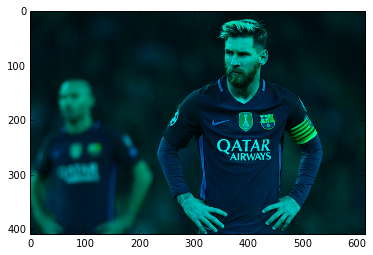

In [16]:
#going to change red pixels to zero
img_rz = img
img_rz[:,:,2] = 0
img_rzCopy = cv2.cvtColor(img_rz, cv2.COLOR_BGR2RGB)
plt.imshow(img_rzCopy)
#cv2.imshow('red zero messi',img_rz)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

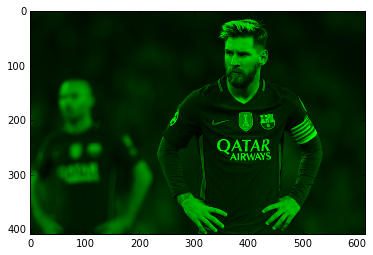

In [17]:
#let's see what happens on changing the blue ones
img_bz = img
img_bz[:,:,0] = 0
img_bzCopy = cv2.cvtColor(img_bz, cv2.COLOR_BGR2RGB)
plt.imshow(img_bzCopy)
#cv2.imshow('blue zero messi',img_bz)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

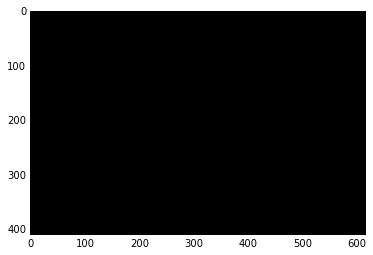

In [18]:
#ofcourse now with the green ones
img_gz = img
img_gz[:,:,1] = 0
img_gzCopy = cv2.cvtColor(img_gz, cv2.COLOR_BGR2RGB)
plt.imshow(img_gzCopy)
#cv2.imshow('green zero messi',img_gz)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [19]:
#why am I getting a completely black screen when green values are made zero?
#print img_gz
#print img_rz
#print img_bz
#print img
#why are they all completely zero?

## Adding border to image

In [20]:
constant = cv2.copyMakeBorder(img2,10,10,10,10,cv2.BORDER_CONSTANT,value=[255,0,0])

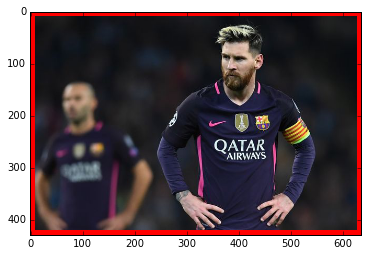

In [21]:
plt.imshow(constant)

## Addition of 2 images

In [22]:
x = np.uint8([250])
y = np.uint8([10])

#### saturated addition of opencv

In [23]:
ret = cv2.add(x,y)
print ret
print type(ret)
print ret.shape

[[255]]
<type 'numpy.ndarray'>
(1, 1)


#### modulo addition of numpy

In [24]:
ret = x+y
print ret
print type(ret)
print ret.shape

[4]
<type 'numpy.ndarray'>
(1,)


#### Doubt: why are they returning arrays of different dimensions

## Blending 2 images

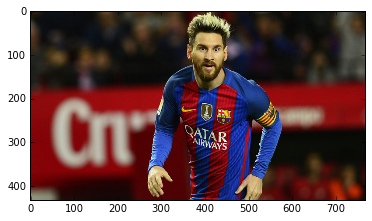

In [25]:
img1 = cv2.imread('/home/manik/images/messi3.jpg')
img1Copy = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1Copy)

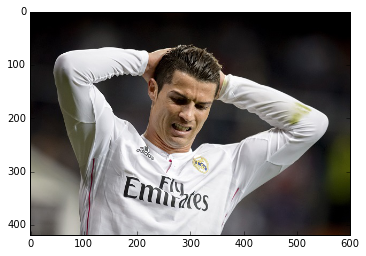

In [26]:
img2 = cv2.imread('/home/manik/images/ronaldo3.jpg')
img2Copy = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2Copy)

In [27]:
print img1.shape
print img2.shape

(432, 768, 3)
(419, 600, 3)


In [28]:
#I will crop them to make them of the same size so that arithmetic operations can be performed
img1 = img1[0:419,0:600]
print img1.shape
print img2.shape

(419, 600, 3)
(419, 600, 3)


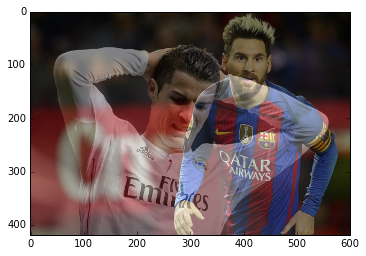

In [29]:
blended = cv2.addWeighted(img1,0.5,img2,0.5,0) #the 3 numbers are alpha, beta and gama
blendedCopy = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
plt.imshow(blendedCopy)

## Bit wise operations
### I want to put ronaldo on top of messi (because he is :p)

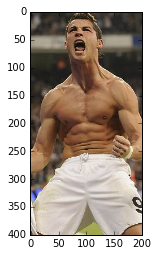

In [31]:
img2 = cv2.imread('/home/manik/images/ronaldo4.jpg')
img2Copy = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2Copy)

In [32]:
#I will place him at the top left corner. Creating a roi in that area
rows,cols,channels = img2.shape
roi = img1[0:rows,0:cols]

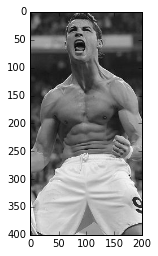

In [37]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray,cmap='gray')

In [49]:
#creating mask and inverse mask
ret,mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

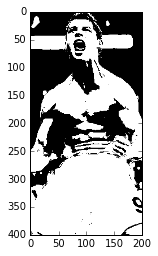

In [50]:
plt.imshow(mask,cmap= 'gray')

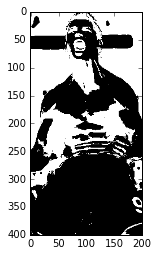

In [51]:
plt.imshow(mask_inv, cmap='gray')

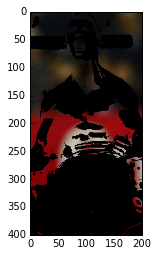

In [55]:
#assuming that white part is the only importand part of the image. create the background
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img1_bg_copy = cv2.cvtColor(img1_bg,cv2.COLOR_BGR2RGB)
plt.imshow(img1_bg_copy)
#clearly the white part of mask is blacked out here

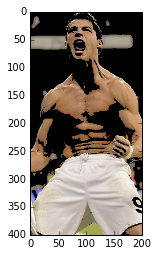

In [57]:
#now create the foreground
img2_fg = cv2.bitwise_and(img2,img2,mask=mask)
img2_fg_copy = cv2.cvtColor(img2_fg,cv2.COLOR_BGR2RGB)
plt.imshow(img2_fg_copy)

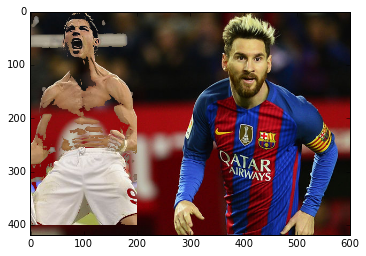

In [58]:
#add bg and fg
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows,0:cols] = dst
img1_copy = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1_copy)

### Exercise: creating a slideshow of images using addWeighted

In [59]:
img1 = cv2.imread('/home/manik/images/messi3.jpg')
img2 = cv2.imread('/home/manik/images/ronaldo3.jpg')
img1 = img1[0:419,0:600]
print img1.shape
print img2.shape

(419, 600, 3)
(419, 600, 3)


In [70]:
alpha = 1
for i in range (0,11):
    dst = cv2.addWeighted(img1,alpha,img2,1-alpha,0)
    cv2.imwrite(str(i)+'.jpg',dst)
    alpha = alpha - 0.1
#works well